In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
data = pd.read_csv("user_satisfaction_survey.csv")

In [64]:
X = data.drop(['Churn','ID'], axis=1) #Dropping the ID column also - its not needed
y = data['Churn']

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [66]:
def convert_yes_no(text):
    if 'Yes' in text:
        return 1
    else: return 0

In [67]:
X.Happy_with_instructors = X.Happy_with_instructors.apply(convert_yes_no)
X.Happy_with_class_duration = X.Happy_with_class_duration.apply(convert_yes_no)
X.Happy_with_class_timings = X.Happy_with_class_timings.apply(convert_yes_no)
X.Happy_with_class_size = X.Happy_with_class_size.apply(convert_yes_no)
X.Happy_with_facilities = X.Happy_with_facilities.apply(convert_yes_no)
X.Happy_with_price = X.Happy_with_price.apply(convert_yes_no)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [70]:
dtree = DecisionTreeClassifier()

In [71]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from sklearn import tree
import pydotplus

In [75]:
features = list(data.columns[1:8])
features

['Classes_per_week',
 'Happy_with_instructors',
 'Happy_with_class_duration',
 'Happy_with_class_timings',
 'Happy_with_class_size',
 'Happy_with_facilities',
 'Happy_with_price']

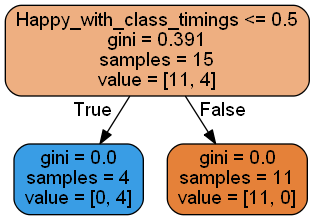

In [76]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  